In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [4]:
# To load the numpy array files for each sample from a destination folder 

import os
features = np.empty([100,241])
directory = 'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin'
for filename in os.listdir(directory):
    if filename.endswith(".npy"): 
        print(os.path.join(directory, filename))       
        features  = np.append(features,np.load(os.path.join(directory, filename), allow_pickle=True), axis=0) 
        print(os.path.join(directory, filename))
    else:
        continue

features = features[100:,:]
features.shape

C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC10_CALYX_02_09_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC10_CALYX_02_09_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC12_CALYX_02_10_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC12_CALYX_02_10_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC13_CALYX_02_11_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC13_CALYX_02_11_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC15_CALYX_02_12_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC15_CALYX_02_12_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Skin\NIR_FC17_CALYX_02_16_2021_SKIN.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/

(2200, 241)

In [6]:
# To load the label CSV file ( target values) for the entire dataset 
from numpy import genfromtxt
labels = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI//Pixel vectors/Skin/Labels.csv', delimiter=',')
labels.shape

(2200,)

In [7]:
# convert numpy array to pandas dataframe 
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,-0.007843,-0.003922,-0.015686,-0.007843,0.015686,0.015686,0.031373,0.062745,0.098039,0.145098,...,-0.050980,-0.039216,-0.043137,-0.043137,-0.050980,-0.054902,-0.039216,-0.062745,-0.043137,-0.031373
1,0.000000,-0.007843,-0.011765,-0.003922,-0.003922,0.003922,0.031373,0.050980,0.078431,0.129412,...,-0.047059,-0.047059,-0.066667,-0.031373,-0.047059,-0.043137,-0.031373,-0.058824,-0.039216,-0.039216
2,0.000000,-0.003922,-0.011765,0.011765,0.003922,0.023529,0.039216,0.054902,0.082353,0.133333,...,-0.047059,-0.039216,-0.054902,-0.047059,-0.047059,-0.043137,-0.043137,-0.035294,-0.039216,-0.047059
3,0.023529,-0.007843,-0.003922,0.000000,0.015686,0.023529,0.027451,0.047059,0.090196,0.129412,...,-0.043137,-0.054902,-0.050980,-0.031373,-0.047059,-0.027451,-0.054902,-0.050980,-0.043137,-0.047059
4,0.000000,-0.003922,-0.003922,0.003922,0.003922,0.019608,0.031373,0.066667,0.098039,0.129412,...,-0.050980,-0.023529,-0.031373,-0.031373,-0.050980,-0.031373,-0.043137,-0.035294,-0.047059,-0.027451


In [8]:
# load wavelength info. each wavelength respond to 1 band
df_wave = pd.read_csv('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/bands.csv')
df_wave

,Wavelength(nm),Band
0,900.1773,1
1,903.5323,2
2,906.8871,3
3,910.2417,4
4,913.5961,5
...,...,...
236,1686.8290,237
237,1690.1410,238
238,1693.4520,239
239,1696.7630,240


In [9]:
## To add label data to the dataframe and rename each column using the corresponding wavelength
df.columns = df_wave['Wavelength(nm)']
df['Label'] = labels
df.head()

Wavelength(nm),900.1773,903.5323,906.8871,910.2417,913.5961,916.9503,920.3044,923.6582,927.0119,930.3654,...,1673.582,1676.894,1680.2060000000001,1683.5179999999998,1686.829,1690.141,1693.4520000000002,1696.763,1700.0739999999998,Label
0,-0.007843,-0.003922,-0.015686,-0.007843,0.015686,0.015686,0.031373,0.062745,0.098039,0.145098,...,-0.039216,-0.043137,-0.043137,-0.050980,-0.054902,-0.039216,-0.062745,-0.043137,-0.031373,0.0
1,0.000000,-0.007843,-0.011765,-0.003922,-0.003922,0.003922,0.031373,0.050980,0.078431,0.129412,...,-0.047059,-0.066667,-0.031373,-0.047059,-0.043137,-0.031373,-0.058824,-0.039216,-0.039216,0.0
2,0.000000,-0.003922,-0.011765,0.011765,0.003922,0.023529,0.039216,0.054902,0.082353,0.133333,...,-0.039216,-0.054902,-0.047059,-0.047059,-0.043137,-0.043137,-0.035294,-0.039216,-0.047059,0.0
3,0.023529,-0.007843,-0.003922,0.000000,0.015686,0.023529,0.027451,0.047059,0.090196,0.129412,...,-0.054902,-0.050980,-0.031373,-0.047059,-0.027451,-0.054902,-0.050980,-0.043137,-0.047059,0.0
4,0.000000,-0.003922,-0.003922,0.003922,0.003922,0.019608,0.031373,0.066667,0.098039,0.129412,...,-0.023529,-0.031373,-0.031373,-0.050980,-0.031373,-0.043137,-0.035294,-0.047059,-0.027451,0.0


In [10]:
# Dataframe transformation to match the input data format of lineplot function in seaborn 
df_melt = df.melt(id_vars='Label', value_name='Reflectance')
df_melt.head()

,Label,Wavelength(nm),Reflectance
0,0.0,900.177,-0.007843
1,0.0,900.177,0.000000
2,0.0,900.177,0.000000
3,0.0,900.177,0.023529
4,0.0,900.177,0.000000


In [67]:
# To define the colormap mapping 0,1 to different colors
from matplotlib.colors import ListedColormap
sorghum_cmap = ListedColormap(['#BBBBBB', '#32CD32'], name='organs') # hex code  #, '#FF8C00', '#9400D3'

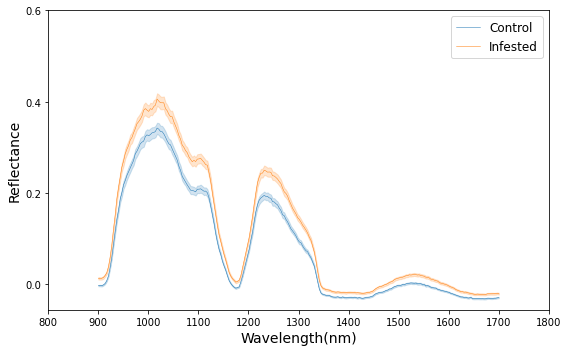

In [72]:
# To plot the spectrum of all the pixels for control and infested regions

fig, ax = plt.subplots(figsize=(8, 5)) # define a figure and a single axes object
ax = sns.lineplot(ax=ax, data=df_melt, x='Wavelength(nm)', y='Reflectance',  
                  hue='Label', linewidth=.5)
ax.set_xticks([800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800])
ax.set_yticks([0.0, 0.2, 0.4, 0.6])
ax.set_ylabel('Reflectance', fontsize=14)
ax.set_xlabel('Wavelength(nm)', fontsize=14)
ax.legend(frameon=True, fontsize=12, labels=['Control','Infested'])

ax.spines['right'].set_visible(True) # remove right axis
ax.spines['top'].set_visible(True) # remove top axis
plt.tight_layout()
#plt.savefig('hyp_signature.png', dpi=300) # save figuer with resolution of 300 dpi
plt.show()

In [13]:
from sklearn.decomposition import PCA # import PCA class from scikit-learn

In [53]:
pca = PCA(n_components=10) # let's consider the first 10 PCs
pca_results = pca.fit_transform(features) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results.shape)
pca_scores = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

(2200, 10)
variance explained by the first two PCs: 95.15%, 3.29%


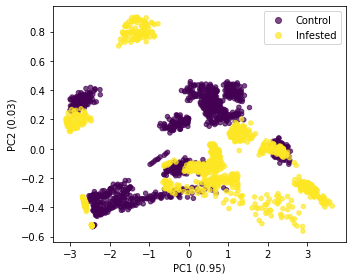

In [54]:
# To visualize first two components
fig, ax = plt.subplots(figsize=(5,4))
s1, s2 = pca_results[:, 0], pca_results[:, 1]
scatter = ax.scatter(s1, s2, c=labels, s=20, alpha=0.7)

# create the legend
hs, _ = scatter.legend_elements() # handlers of the legend
ls = ['Control','Infested'] # labels of the legend
ax.legend(hs, ls)

# add labels
ax.set_xlabel('PC1 (%.2f)'%pca_scores[0])
ax.set_ylabel('PC2 (%.2f)'%pca_scores[1])

plt.tight_layout()
plt.savefig('pca.png', dpi=150)
plt.show()

In [49]:
from sklearn.model_selection import KFold # for five fold cross validation
from sklearn.metrics import confusion_matrix # calcuate confusion matrix
from sklearn.metrics import classification_report

In [50]:
from sklearn import svm

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = svm.SVC(kernel='rbf') # try linear kernel also
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(classification_report(y_test, y_predict, labels=[0, 1]))

overal accuracy: 0.955
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       214
           1       0.94      0.97      0.96       226

    accuracy                           0.95       440
   macro avg       0.96      0.95      0.95       440
weighted avg       0.95      0.95      0.95       440

overal accuracy: 0.923
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       234
           1       0.90      0.94      0.92       206

    accuracy                           0.92       440
   macro avg       0.92      0.92      0.92       440
weighted avg       0.92      0.92      0.92       440

overal accuracy: 0.950
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       216
           1       0.96      0.94      0.95       224

    accuracy                           0.95       440
   macro avg       0.95      0.95      0.95       440
weigh

In [33]:

from sklearn.neighbors import KNeighborsClassifier as KNN

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = KNN(n_neighbors=5) # default is 5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_train)
    acc = (y_predict==y_train).sum()/len(y_train)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_train, y_predict, labels=[0,1])
    print(classification_report(y_train, y_predict, labels=[0, 1]))
    
## plot confusion matrix

overal accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       886
           1       0.99      1.00      1.00       874

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760

overal accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       866
           1       0.99      1.00      0.99       894

    accuracy                           0.99      1760
   macro avg       0.99      0.99      0.99      1760
weighted avg       0.99      0.99      0.99      1760

overal accuracy: 0.994
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       884
           1       0.99      1.00      0.99       876

    accuracy                           0.99      1760
   macro avg       0.99      0.99      0.99      1760
weigh

In [38]:
from sklearn.ensemble import RandomForestClassifier as RF

In [39]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = RF() # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_train)
    acc = (y_predict==y_train).sum()/len(y_train)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_train, y_predict, labels=[0,1])
    print(classification_report(y_train, y_predict, labels=[0, 1]))

overal accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       874

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760

overal accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       866
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760

overal accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       876

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weigh

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = LDA() # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(classification_report(y_test, y_predict, labels=[0, 1]))

overal accuracy: 0.757
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       214
           1       0.82      0.67      0.74       226

    accuracy                           0.76       440
   macro avg       0.77      0.76      0.76       440
weighted avg       0.77      0.76      0.76       440

overal accuracy: 0.761
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       234
           1       0.77      0.69      0.73       206

    accuracy                           0.76       440
   macro avg       0.76      0.76      0.76       440
weighted avg       0.76      0.76      0.76       440

overal accuracy: 0.750
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       216
           1       0.78      0.71      0.74       224

    accuracy                           0.75       440
   macro avg       0.75      0.75      0.75       440
weigh

In [55]:
## AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# train and evaluate your model
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = AdaBoostClassifier(n_estimators=1000, learning_rate=.5) # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_train)
    acc = (y_predict==y_train).sum()/len(y_train)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_train, y_predict, labels=[0,1])
    print(classification_report(y_train, y_predict, labels=[0, 1]))
# show the confusion matrix

overal accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       874

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760

overal accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       866
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760

overal accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       876

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weigh

In [57]:
# To import a test image  
from spectral import imshow, view_cube
import spectral.io.envi as envi
dark_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_DARK_02_01_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_DARK_02_01_2021.raw')
data_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_FC1_CALYX_02_01_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_FC1_CALYX_02_01_2021.raw')

dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())



C:\Users\nek222\Anaconda3\lib\site-packages\spectral\io\envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Header parameter names converted to lower case.
Header parameter names converted to lower case.


<ipython-input-57-4d6f4b5de41f>:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dark_nparr = np.array(dark_ref.load())
<ipython-input-57-4d6f4b5de41f>:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_nparr = np.array(data_ref.load())


In [58]:
# To crop the image and calibrate it
dark_nparr = dark_nparr[0:300,:,:]
data_nparr = data_nparr[0:300,:,:] 
corrected_nparr = np.subtract(data_nparr, dark_nparr)/255

In [64]:
# To apply the random forest model to make predictions about the pixels of the test image
clf = RF()
clf.fit(features, labels)

   
# make predictions
x, y, z = corrected_nparr.shape
x_test = corrected_nparr.reshape(x*y, z) # reshape 3d (443, 320, 243) to 2d (141760, 243) 
x_test = x_test[:,6:247]

pca = PCA(n_components=40) # let's only consider the first two PCs
pca_results_x_test = pca.fit_transform(x_test) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results_x_test.shape)
pca_scores = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

   
y_test = clf.predict(x_test).reshape(x, y) # reshape (141760, ) back to (443, 320) to make picture
y_test = y_test[:,6:247]
print(y_test.shape)

(96000, 40)
variance explained by the first two PCs: 99.02%, 0.33%
(300, 241)


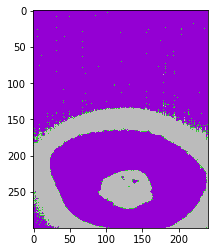

In [66]:
# define the colormap mapping 0,1,2 to different colors
from matplotlib.colors import ListedColormap
# show our prediction results
cmap = ListedColormap(['#FFFFFF', '#32CD32', '#9400D3'], name='test') #, '#FF8C00', '#BBBBBB'
plt.imshow(y_test, cmap=cmap)
# plt.imsave('test.png', y_test, cmap=cmap) # run if you want to save the prediction as a png file